In [1]:
# %pip install tifffile matplotlib --upgrade

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import json

**Learning Goals**

In this notebook, we will learn the essentials of handling TIFF files in scientific imaging with Python's `tifffile` library. 
- reading and writing basic TIFF files. 
- stacked and OME-TIFF formats and metadata handling. 
- reading large TIFF files in chunks

---

### Understanding the TIFF File structure 

A single frame TIFF File has only one `page` or just one image. Here we will learn how to read and write single frame TIFF Files. Usually, it also comes with some metadata about the data. `tifffile` has methods to read and write TIFF Files and can handle metadata.

**Example** Read `page_1.tif` as `tif_1` and display 

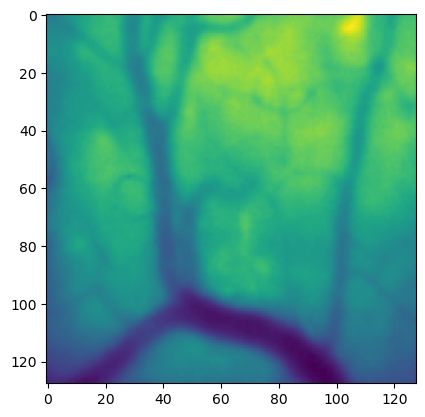

In [3]:
tif_1 = tiff.imread('data/page_1.tif')
plt.imshow(tif_1)

Read `page_2.tif` as `tif_2` and display

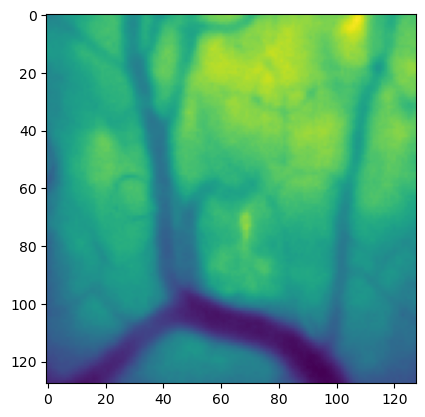

In [4]:
tif_2 = tiff.imread('data/page_2.tif')
plt.imshow(tif_2)

Read `page_3.tif` as `tif_3` and display

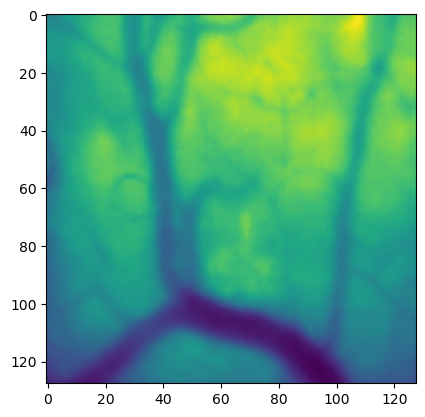

In [5]:
tif_3 = tiff.imread('data/page_3.tif')
plt.imshow(tif_3)

Read `page_4.tif`as `tif_4` and display

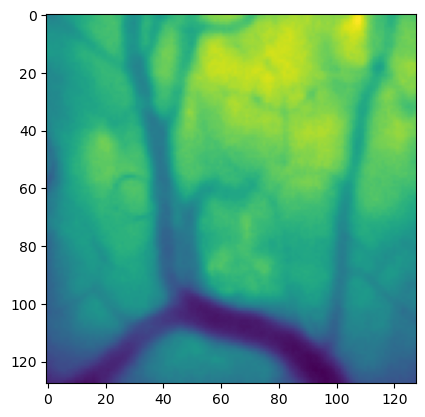

In [6]:
tif_4 = tiff.imread('data/page_4.tif')
plt.imshow(tif_4)

**Example** What kind of metadata is stored in tags of `page_1.tif`?

In [7]:
with tiff.TiffFile('data/page_1.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

ImageWidth: 128
ImageLength: 128
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
ImageDescription: {"shape": [128, 128]}
StripOffsets: (304,)
SamplesPerPixel: 1
RowsPerStrip: 128
StripByteCounts: (32768,)
XResolution: (1, 1)
YResolution: (1, 1)
ResolutionUnit: 1
Software: tifffile.py


What kind of metadata is stored in tags of `page_2.tif`?

In [8]:
with tiff.TiffFile('data/page_2.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

ImageWidth: 128
ImageLength: 128
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
ImageDescription: {"shape": [128, 128]}
StripOffsets: (304,)
SamplesPerPixel: 1
RowsPerStrip: 128
StripByteCounts: (32768,)
XResolution: (1, 1)
YResolution: (1, 1)
ResolutionUnit: 1
Software: tifffile.py


| Tag                         | Description |
|-----------------------------|-------------|
| **ImageWidth (128)**        | The width of the image in pixels. |
| **ImageLength (128)**       | The length (or height) of the image in pixels. |
| **BitsPerSample (16)**      | The number of bits per component. In this case, 16 bits per sample, indicating a high dynamic range for each pixel. |
| **Compression (1)**         | The type of compression used. '1' usually denotes no compression. |
| **PhotometricInterpretation (1)** | Defines the color space of the image. '1' typically indicates a grayscale image where 0 is black. |
| **ImageDescription ({"shape": [128, 128]})** | A custom field, likely JSON-formatted, describing the shape of the image array. |
| **StripOffsets (304)**      | The byte offset of the image data, indicating the start of image data after 304 bytes from the file's beginning. |
| **SamplesPerPixel (1)**     | The number of components per pixel. '1' indicates a single component per pixel, typical for grayscale images. |
| **RowsPerStrip (128)**      | The number of rows in each strip of image data. Suggests the entire image is one strip. |
| **StripByteCounts (32768)** | The size of each strip in bytes, indicating the amount of data in each strip of the image. |
| **XResolution, YResolution ((1, 1))** | The horizontal and vertical resolution of the image in pixels per ResolutionUnit. Set to (1,1) for a normal aspect ratio. |
| **ResolutionUnit (1)**      | The unit of measurement for XResolution and YResolution. '1' usually means no absolute unit of measurement. |
| **Software (tifffile.py)**  | Indicates the software used to create or modify the TIFF file, here being the 'tifffile.py' Python library. |

What kind of metadata is stored in tags of `page_3.tif`?

In [9]:
with tiff.TiffFile('data/page_3.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

ImageWidth: 128
ImageLength: 128
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
ImageDescription: {"shape": [128, 128]}
StripOffsets: (304,)
SamplesPerPixel: 1
RowsPerStrip: 128
StripByteCounts: (32768,)
XResolution: (1, 1)
YResolution: (1, 1)
ResolutionUnit: 1
Software: tifffile.py


What kind of metadata is stored in tags of `page_4.tif`?

In [10]:
with tiff.TiffFile('data/page_4.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

ImageWidth: 128
ImageLength: 128
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
ImageDescription: {"shape": [128, 128]}
StripOffsets: (304,)
SamplesPerPixel: 1
RowsPerStrip: 128
StripByteCounts: (32768,)
XResolution: (1, 1)
YResolution: (1, 1)
ResolutionUnit: 1
Software: tifffile.py


Since all four TIFF files have identical tags, they are likely to have the same dimensions, bit depth, and are grayscale images without compression. This uniformity suggests they might be part of a series or were processed under the same conditions which is true as they are part of a 1000 page Multi-frame TIFF File. There is a custom field here called ImageDescription. Let's try to add more information to that field.

Adding new information into metadata involves two steps
1. Reading the already existing information as dictionary and adding new fields 
2. Saving as a new TIFF File

```python
# Step 1
with tiff.TiffFile('data/page_1.tif') as tif:
    page = tif.pages[0].asarray()
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    description['page_num'] = 1

# Step 2
new_description = json.dumps(description)
tiff.imsave('data/page_1_new.tif', page, description=new_description, metadata=None) 
```


**Example** Add `page_num` field to `page_1.tif` and save it as `page_1_new.tif` in the `data/` directory

In [11]:
with tiff.TiffFile('data/page_1.tif') as tif:
    page = tif.pages[0].asarray()
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    description['page_num'] = 1

new_description = json.dumps(description)
tiff.imsave('data/page_1_new.tif', page, description=new_description, metadata=None) 


Add `page_num` field to `page_2.tif` and save it as `page_2_new.tif`

In [12]:
with tiff.TiffFile('data/page_2.tif') as tif:
    page = tif.pages[0].asarray()
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    description['page_num'] = 2

new_description = json.dumps(description)
tiff.imsave('data/page_2_new.tif', page, description=new_description, metadata=None) 


Add `page_num` field to `page_3.tif` and save it as `page_3_new.tif`

In [13]:
with tiff.TiffFile('data/page_3.tif') as tif:
    page = tif.pages[0].asarray()
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    description['page_num'] = 3

new_description = json.dumps(description)
tiff.imsave('data/page_3_new.tif', page, description=new_description, metadata=None) 


Add `page_num` field to `page_4.tif` and save it as `page_4_new.tif`

In [14]:
with tiff.TiffFile('data/page_4.tif') as tif:
    page = tif.pages[0].asarray()
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    description['page_num'] = 4

new_description = json.dumps(description)
tiff.imsave('data/page_4_new.tif', page, description=new_description, metadata=None) 

### Multi-frame TIFF File

A single frame TIFF File cannot capture the dynamic changes in calcium levels within cells over time. Multi-frame images in calcium imaging are typically acquired as time-lapse sequences where each frame in a sequence represents a snapshot at a specific time point. Therefore, a multi-frame TIFF File has (as the name implies) multiple pages. Let us see how to handle such data in `Python` with the help of `tifffile`

In [15]:
frames = tiff.imread('data/data_endoscope.tif')
frames.shape

(1000, 128, 128)

We read `data_endoscope.tif` file and the process is same as reading a single-frame TIFF File. We can see how many frames it has by `Numpy` method `.shape`. We see three numbers there meaning that it is a three dimensional data. 

1000: This is the number of frames or images in the TIFF file. It suggests that our file is a stack of 1000 separate images. In the context of calcium imaging, this usually corresponds to 1000 different time points at which the images were captured.

128: the first 128 represents the width of each image/frame in pixels

128: the first 128 represents the height of each image/frame in pixels

Now let us see different ways of handling such data with `tifffile`

**Example** Read only the first frame from `data/data_endoscope.tif`

In [16]:
frame_1 = tiff.imread('data/data_endoscope.tif', key=0)
frame_1.shape

(128, 128)

Read only the tenth frame from `data/data_endoscope.tif`

In [17]:
frame_10 = tiff.imread('data/data_endoscope.tif', key=9)
frame_10.shape

(128, 128)

Read only the last frame from `data/data_endoscope.tif`

In [18]:
frame_1000 = tiff.imread('data/data_endoscope.tif', key=999)
frame_1000.shape

(128, 128)

Read only the 500th frame from `data/data_endoscope.tif`

In [19]:
frame_500 = tiff.imread('data/data_endoscope.tif', key=499)
frame_500.shape

(128, 128)

**Example** Read only 1st, 2nd, and 3rd frames

In [20]:
frames = tiff.imread('data/data_endoscope.tif', key=(0,1,2))
frames.shape

(3, 128, 128)

Read only 10th, 500th, 1000th frames

In [21]:
frames = tiff.imread('data/data_endoscope.tif', key=(9,499,999))
frames.shape

(3, 128, 128)

**Example** Read only the first ten frames 

In [22]:
frames = tiff.imread('data/data_endoscope.tif', key=range(0,10))
frames.shape

(10, 128, 128)

Read only last ten frames

In [23]:
frames = tiff.imread('data/data_endoscope.tif', key=range(990,1000))
frames.shape

(10, 128, 128)

Read last ten frames but in steps of two

In [24]:
frames = tiff.imread('data/data_endoscope.tif', key=range(990,1000, 2))
frames.shape

(5, 128, 128)

**Example** Add `frame_rate=10` to `ImageDescription` tag in all pages and save as new TIFF File

In [25]:
with tiff.TiffFile('data/data_endoscope.tif') as in_tif:
    frames = [page.asarray() for page in in_tif.pages]
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    print(description)


frame_rate = 10
description['frame_rate'] = frame_rate
new_description = json.dumps(description)

with tiff.TiffWriter('data/modified_tiff_file.tif') as out_tif:
    for frame in frames:
        out_tif.save(frame, description=new_description, metadata=None)

{'shape': [128, 128]}


In [26]:
with tiff.TiffFile('data/modified_tiff_file.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

ImageWidth: 128
ImageLength: 128
BitsPerSample: 16
Compression: 1
PhotometricInterpretation: 1
ImageDescription: {"shape": [128, 128], "frame_rate": 10}
StripOffsets: (256,)
SamplesPerPixel: 1
RowsPerStrip: 128
StripByteCounts: (32768,)
XResolution: (1, 1)
YResolution: (1, 1)
ResolutionUnit: 1
Software: tifffile.py


Add `decay_time=2.0` to `ImageDescription` of all frames and save `modified_tiff_file_2.tiff`

In [27]:
with tiff.TiffFile('data/data_endoscope.tif') as in_tif:
    frames = [page.asarray() for page in in_tif.pages]
    description = json.loads(tif.pages[0].tags['ImageDescription'].value)
    print(description)


decay_time = 10
description['decay_time'] = frame_rate
new_description = json.dumps(description)

with tiff.TiffWriter('data/modified_tiff_file_2.tif') as out_tif:
    for frame in frames:
        out_tif.save(frame, description=new_description, metadata=None)

{'shape': [128, 128], 'frame_rate': 10}


## OME data

In [29]:
with tiff.TiffFile('data/data_endoscope.tif') as tif:
    ome_metadata = tif.ome_metadata


None
